In [2]:
# Importing the libraries

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pylab as plt

In [3]:
# Unzip the dataset

import shutil
shutil.unpack_archive('data.zip', '')

In [4]:
# Paths

train_path = 'train/'
valid_path = 'validation/'
print('Train path:', train_path)
print('Valid path:', valid_path)

Train path: train/
Valid path: validation/


In [7]:
# ImageDataGenerator

image_gen = ImageDataGenerator(rescale = (1/255.))
image_gen

In [8]:
# Importing imsages

train_gen = image_gen.flow_from_directory(train_path,
                                          batch_size = 32,
                                          target_size = (96, 96),
                                          classes = ['good', 'bad'],
                                          class_mode = 'binary',
                                          seed = 0)

valid_gen = image_gen.flow_from_directory(valid_path,
                                          batch_size = 32,
                                          target_size = (96, 96),
                                          classes = ['good', 'bad'],
                                          class_mode = 'binary',
                                          seed = 0)

Found 695 images belonging to 2 classes.
Found 122 images belonging to 2 classes.


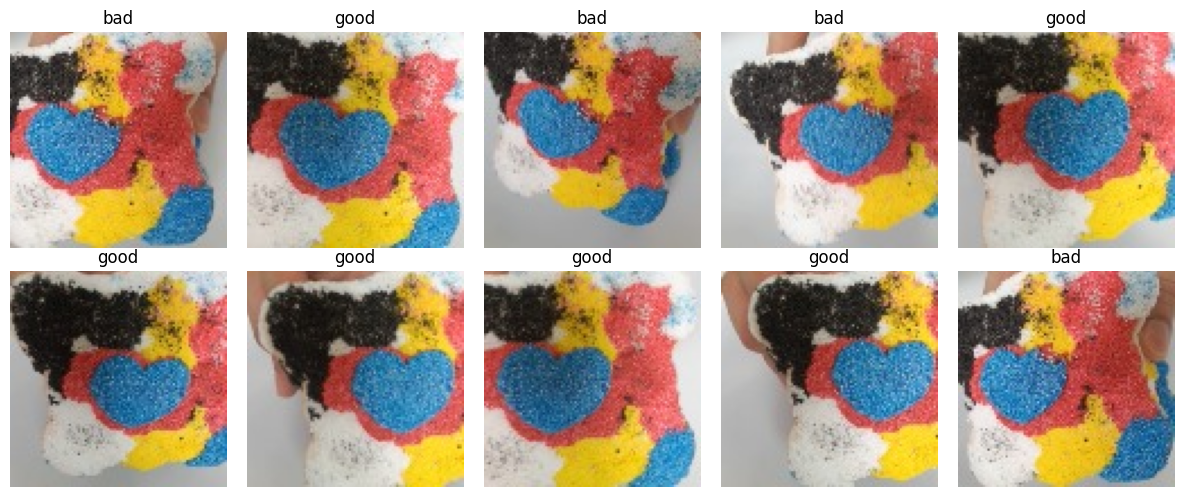

In [9]:
# Displaying images

class_labels = ['good', 'bad']
batch = next(train_gen)
images, labels = batch[0], batch[1]

plt.figure(figsize = (12, 5))
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(class_labels[labels[i].astype(int)])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
# Model

from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

model = Sequential([
    tf.keras.layers.BatchNormalization(),
    Conv2D(16, (3, 3), activation = 'relu'), 
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')    
])

In [12]:
# Compile the model

model.compile(optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['accuracy'])

# Train the model

history = model.fit(train_gen, validation_data = valid_gen, epochs = 3)

Epoch 1/3
22/22 [==============================] - 1s 26ms/step - loss: 0.4029 - accuracy: 0.9137 - val_loss: 2.6341 - val_accuracy: 0.4672
Epoch 2/3
22/22 [==============================] - 1s 24ms/step - loss: 0.0109 - accuracy: 0.9971 - val_loss: 0.2185 - val_accuracy: 0.8770
Epoch 3/3
22/22 [==============================] - 0s 22ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0163 - val_accuracy: 1.0000


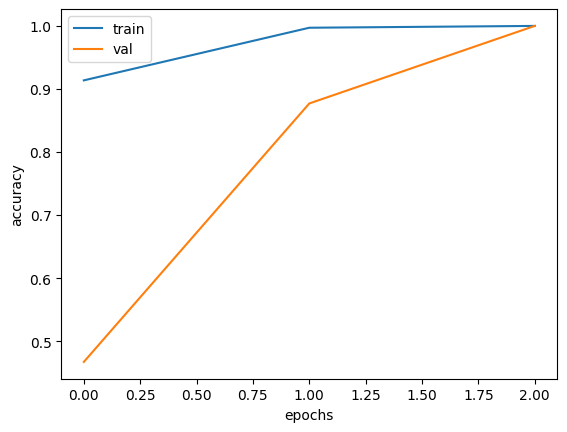

In [13]:
# Plotting the accuracy

plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

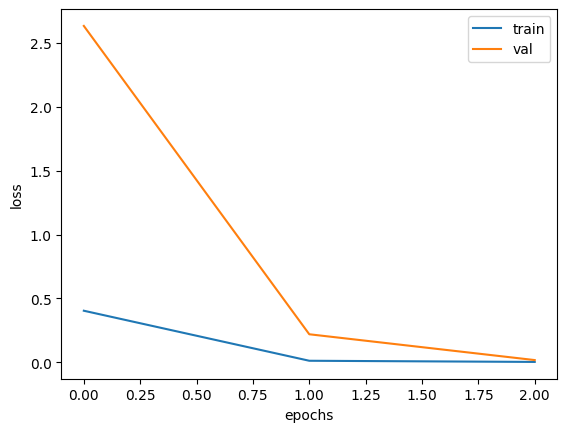

In [14]:
# # Plotting the loss

plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()